## 4.9 Part 2 - Data Visualization

### 1. Importing libraries

### 2. Importing data

### 3. Creating a histogram

### 4. Creating a bar chart

### 5. Creating line charts

### 6. Creating a scatterplot

### 7. Exporting visualizations

#### 1. Importing libraries

In [10]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#### 2. Importing data

In [12]:
path = r'C:\Users\Priya\OneDrive\Documents\CareerFoundry\Data Immersion\Achievement 4\Instacart Basket Analysis'

In [13]:
path

'C:\\Users\\Priya\\OneDrive\\Documents\\CareerFoundry\\Data Immersion\\Achievement 4\\Instacart Basket Analysis'

In [19]:
ords_prods_custs = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [21]:
#Checking the shape of the dataframe
ords_prods_custs.shape

(32399732, 34)

In [23]:
#Viewing the dataframe
ords_prods_custs.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,First Name,Last Name,Gender,State,Age,date_joined,number_of_dependants,family_status,income,_merge
0,2539329,1,prior,1,2,8,7.0,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,prior,1,2,8,7.0,14084,2,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,prior,1,2,8,7.0,12427,3,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,prior,1,2,8,7.0,26088,4,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,prior,1,2,8,7.0,26405,5,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


#### 3. Creating a Histogram

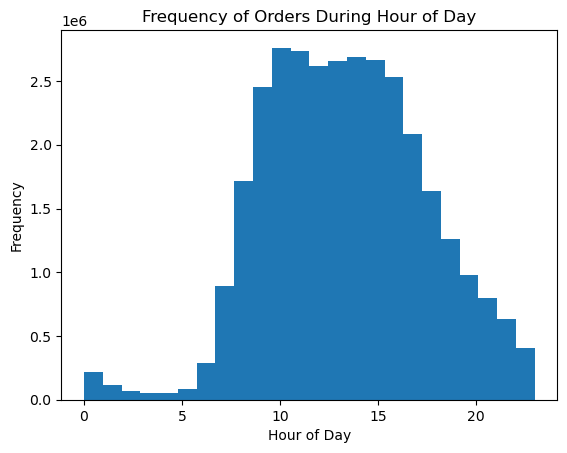

In [26]:
#Creating a histogram of the order_hour_of_day column
hist = ords_prods_custs['order_hour_of_day'].plot.hist(bins = 24)
plt.title('Frequency of Orders During Hour of Day')
plt.xlabel('Hour of Day')
plt.show()

The histogram shows that majority of orders are placed between 8am and 6pm, with the highest frequency of orders being placed from 10am-12pm. The most orders are placed by customers during midday and in the early evening.

#### 4. Creating a Bar Chart

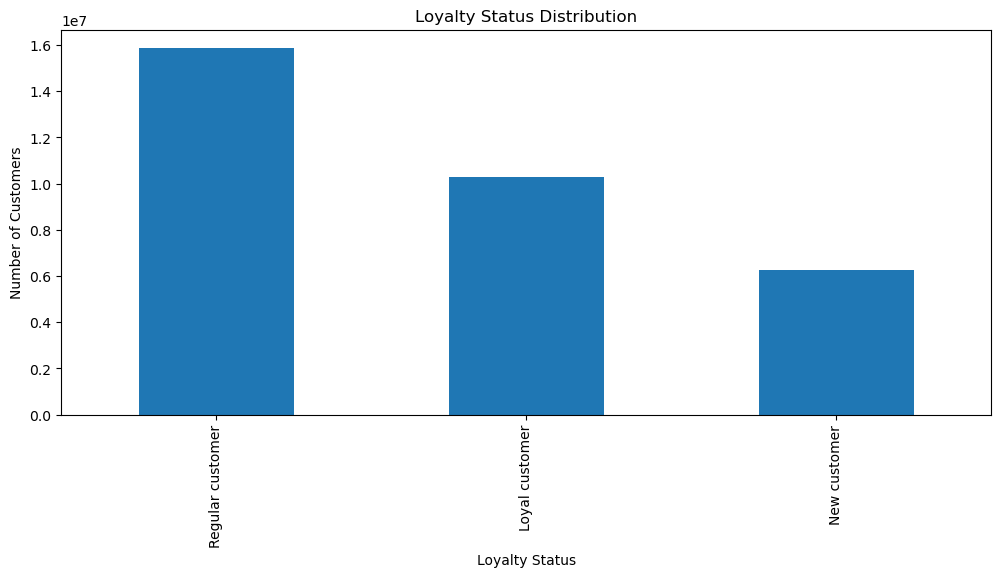

In [30]:
#Creating a bar chart of the loyalty_flag column
bar = ords_prods_custs['loyalty_flag'].value_counts(dropna = False).plot.bar(figsize=(12, 5))
plt.title('Loyalty Status Distribution')
plt.xlabel('Loyalty Status')
plt.ylabel('Number of Customers')
plt.show()

#### 5. Creating Line Charts

In [33]:
#Setting the seed to create a sample
np.random.seed(4)

In [35]:
#Creating a new list called dev for the 70/30 dataframe ratio
dev = np.random.rand(len(ords_prods_custs)) <= 0.7

In [37]:
#Checking dev
dev

array([False,  True, False, ..., False,  True,  True])

In [39]:
#Storing 70% of the sample in the dataframe big
big = ords_prods_custs[dev]

In [41]:
#Storing 30% of the sample in the dataframe small
small = ords_prods_custs[~dev]

In [43]:
#Checking the length of the dataframe
len(ords_prods_custs)

32399732

In [45]:
#Checking the sum of the lengths of both dataframes
len(big) + len(small)

32399732

In [47]:
#Creating a dataframe for only the order_hour_of_day and prices columns
ords_prods_custs_2 = small[['order_hour_of_day','prices']]

In [49]:
#Checking ords_prods_custs_2
ords_prods_custs_2.head()

,order_hour_of_day,prices
0,8,9.0
2,8,4.4
3,8,4.7
6,7,3.0
10,7,4.0


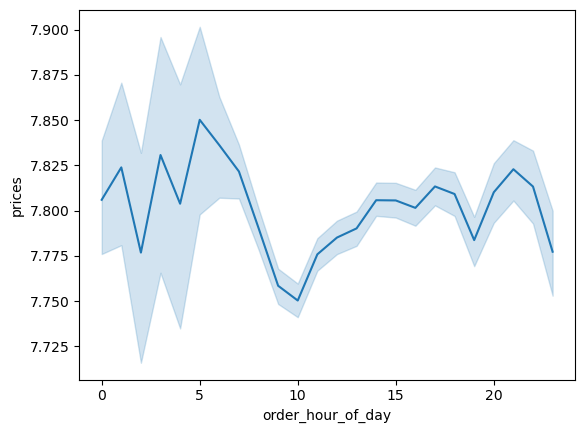

In [51]:
#Creating a line chart for the prices and order_hour_of_day columns
line = sns.lineplot(data = ords_prods_custs_2, x = 'order_hour_of_day',y = 'prices')

In [53]:
#Creating a dataframe for only the Age and number_of_dependants columns
ords_prods_custs_3 = small[['Age','number_of_dependants']]

In [55]:
#Checking ords_prods_custs_3
ords_prods_custs_3.head()

,Age,number_of_dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3


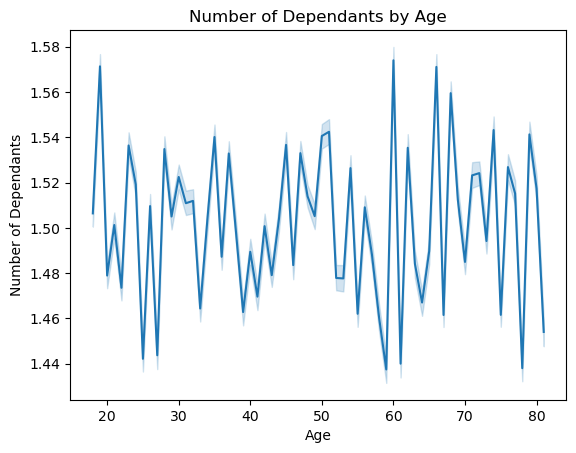

In [57]:
#Creating a line chart for the Age and number_of_dependants columns
line_2 = sns.lineplot(data = ords_prods_custs_3, x = 'Age',y = 'number_of_dependants')
plt.title('Number of Dependants by Age')
plt.xlabel('Age')
plt.ylabel('Number of Dependants')
plt.show()

The line chart does not show any connection between age and number of dependants. There is no clear pattern to indicate any correlation between the two variables.

#### 6. Creating a Scatterplot

In [45]:
#Creating a dataframe for only the Age and income columns
ords_prods_custs_4 = small[['Age','income']]

In [59]:
#Checking ords_prods_custs_4
ords_prods_custs_4.head()

,Age,income
0,31,40423
2,31,40423
3,31,40423
6,31,40423
10,31,40423


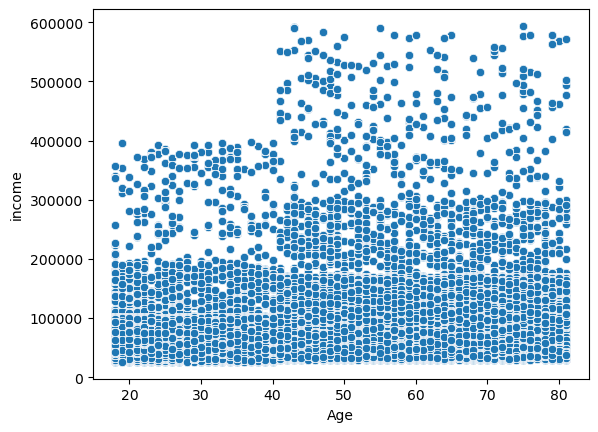

In [47]:
#Creating a scatterplot for the Age and income columns
scatterplot = sns.scatterplot(x = 'Age', y = 'income',data = ords_prods_custs_4)

The scatterplot shows that from ages 20 to 40, income is mostly 200000 and below with some incomes being between 200000 and 400000. After age 40, there is a large increase in the number of people that have higher incomes with many more poeople having incomes over 200000 and many people having incomes over 400000. This indicates that there may be a correlation between age and income with income increasing with age, mostly over the age of 40, but further analysis will be required to confirm this correlation.

#### 7. Exporting Visualizations

In [16]:
#Exporting histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day_frequency.png'))

In [51]:
#Exporting bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [53]:
#Exporting line chart 1
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_price_and_order_hour_of_day.png'))

In [55]:
#Exporting line chart 2
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_and_number_of_dependants.png'))

In [57]:
#Exporting scatterplot
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_and_income.png'))

In [18]:
#Exporting bar chart again
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_status_distribution_bar.png'), bbox_inches='tight')